# Adult Census Income (EDA and Prediction)

In this notebook, I work with Census Income dataset. The prediction task is to determine if a person makes over $50k a year. I start with exhaustive EDA and then try some prediction models to complete the prediction task.

# > **Loading the data**

Firstly we will import some important libraries for data analysis and visualization.

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import os
print(os.listdir("../input"))


['census']


Let us load the dataset into kernel.

In [2]:
data = pd.read_csv("../input/census/adult.csv")

Let us have a first ook at the dataset. We see that there are 32561 rows in the dataset.

In [3]:
print(len(data))
data.head(10)

32561


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


We will check if we have any missing values.

In [4]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

# > **Data visualization**

Firstly we will plot a countplott using seaborns for income variable. It is clearly seen that people with yearly income <=$50k dominate in terms of count.

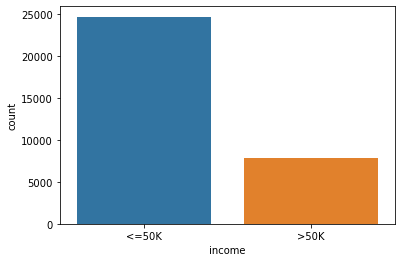

In [6]:
sns.countplot(data['income'])
plt.show()

A countplot of sex variable will give us distribution of male and female in our dataset.

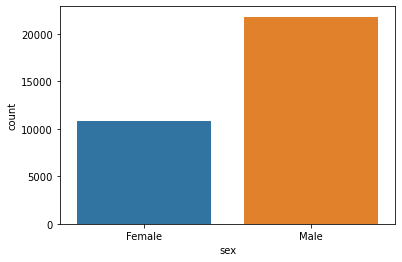

In [7]:
sns.countplot(data['sex'])
plt.show()

We will now plot a histogram to get distribution of age parameter. I have used axvline in the plot to get the mean of age variable.

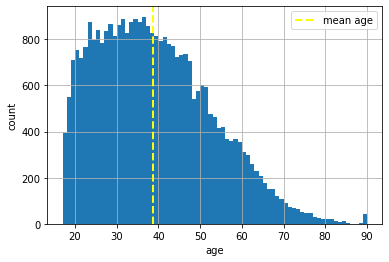

In [8]:
ages = data['age'].hist(bins = max(data['age'] - min(data['age'])))
mean_val = np.mean(data['age'])

plt.axvline(mean_val, color = "yellow", linestyle = 'dashed', linewidth = 2, label = 'mean age')

plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

Now we will plot histogram for "hours worked per week" variable. We will later use this to relate with income parameter.

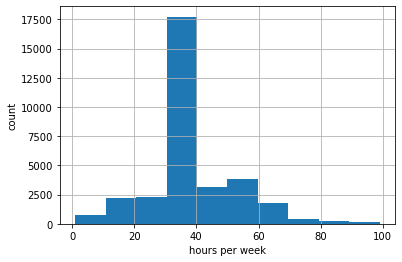

In [9]:
data['hours.per.week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

Similarly we will plot countplots for other parameters using subplots method of matplotlib.

[Text(0, 0, '?'),
 Text(0, 0, 'Exec-managerial'),
 Text(0, 0, 'Machine-op-inspct'),
 Text(0, 0, 'Prof-specialty'),
 Text(0, 0, 'Other-service'),
 Text(0, 0, 'Adm-clerical'),
 Text(0, 0, 'Craft-repair'),
 Text(0, 0, 'Transport-moving'),
 Text(0, 0, 'Handlers-cleaners'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Farming-fishing'),
 Text(0, 0, 'Tech-support'),
 Text(0, 0, 'Protective-serv'),
 Text(0, 0, 'Armed-Forces'),
 Text(0, 0, 'Priv-house-serv')]

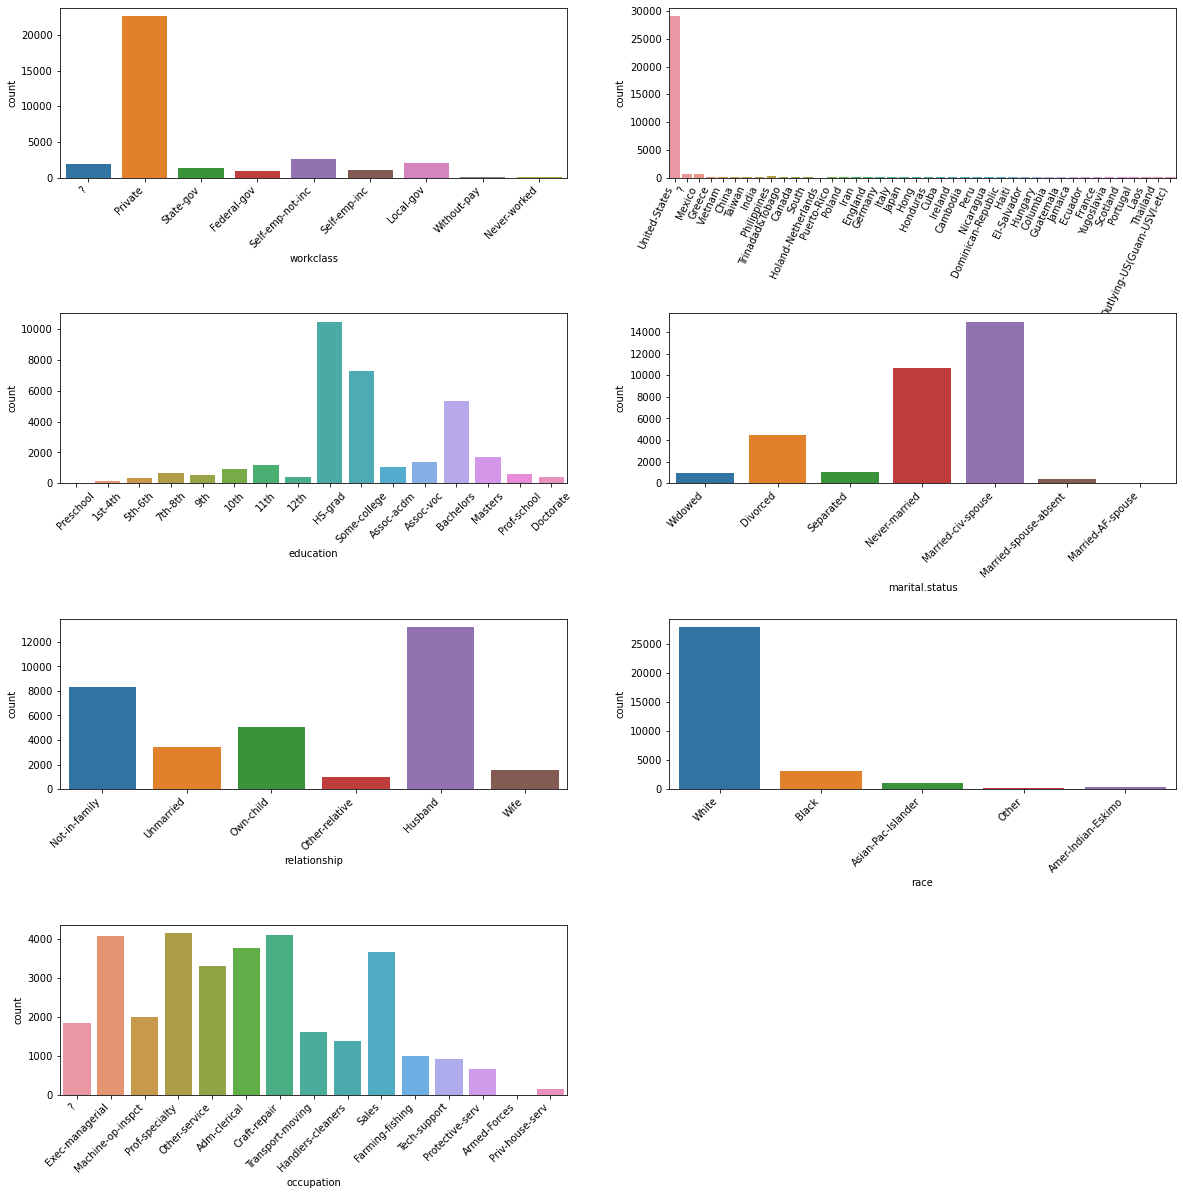

In [10]:
fig, axs = plt.subplots(ncols = 2,nrows= 4, figsize =(20,20))
fig.delaxes(axs[3][1])
plt.subplots_adjust(hspace = 0.8)

#workclass
wc_plot = sns.countplot(data['workclass'], ax = axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation = 45, ha = "right")

#native country
nc_plot = sns.countplot(data['native.country'], ax = axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation = 65, ha = "right")

#education
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(data['education'],order = order, ax = axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation = 45)

#marital status
ms_plot = sns.countplot(data['marital.status'], ax = axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation = 45, ha = "right")

#relationship
r_plot = sns.countplot(data['relationship'], ax = axs[2][0])
r_plot.set_xticklabels(r_plot.get_xticklabels(), rotation = 45, ha = "right")

#race
rc_plot = sns.countplot(data['race'], ax = axs[2][1])
rc_plot.set_xticklabels(rc_plot.get_xticklabels(), rotation = 45, ha = "right")

#occupation
o_plot = sns.countplot(data['occupation'], ax = axs[3][0])
o_plot.set_xticklabels(o_plot.get_xticklabels(), rotation = 45, ha = "right")

Now we visualize sex parameter with occupation and education parameters.

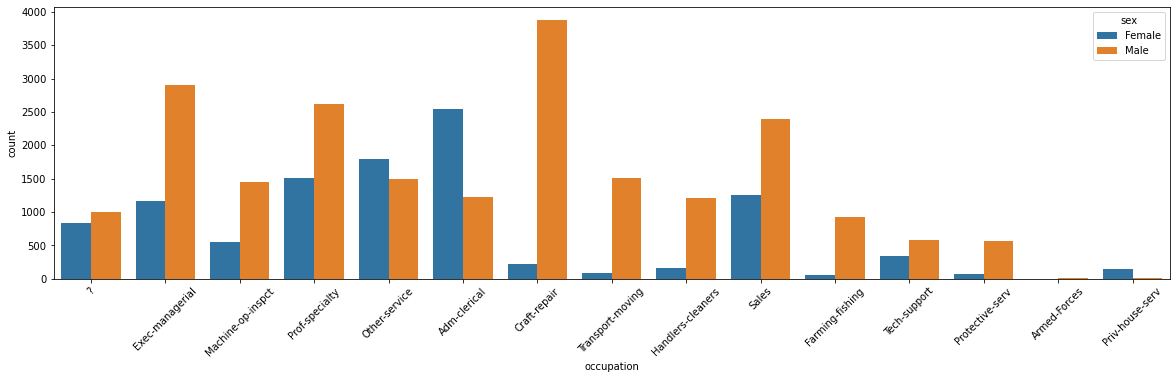

In [11]:
plt.figure(figsize = (20,5))
sex_occupation = sns.countplot(data['occupation'], hue = data['sex'])
sex_occupation.set_xticklabels(sex_occupation.get_xticklabels(), rotation =45)
plt.show()

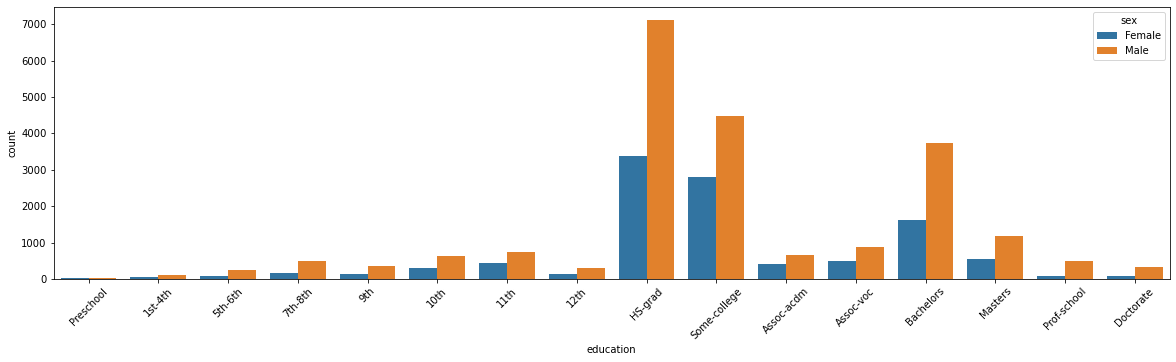

In [12]:
plt.figure(figsize = (20,5))
ed_sex = sns.countplot(data['education'], hue = data['sex'] ,order = order)
ed_sex.set_xticklabels(ed_sex.get_xticklabels(), rotation =45)
plt.show()

In the same fashion, I have plotted dua relationship with income variable and all other variables. 

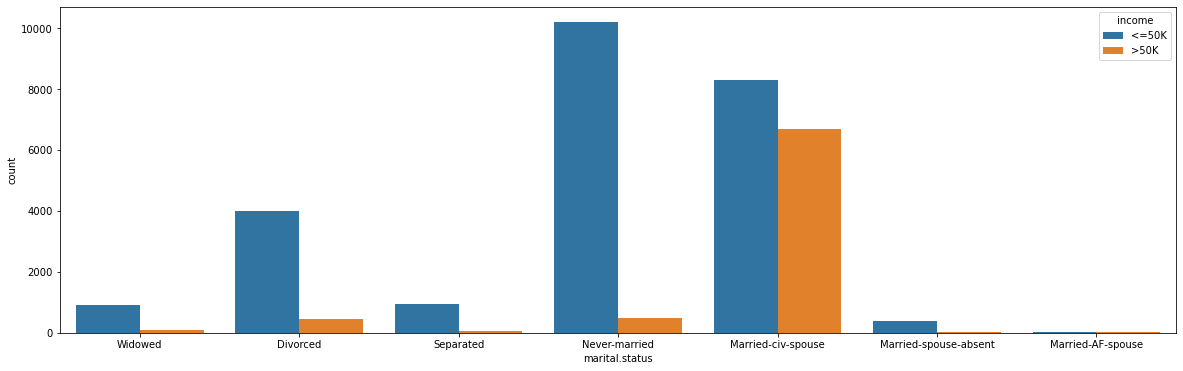

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(data['marital.status'], hue=data['income'])
plt.show()

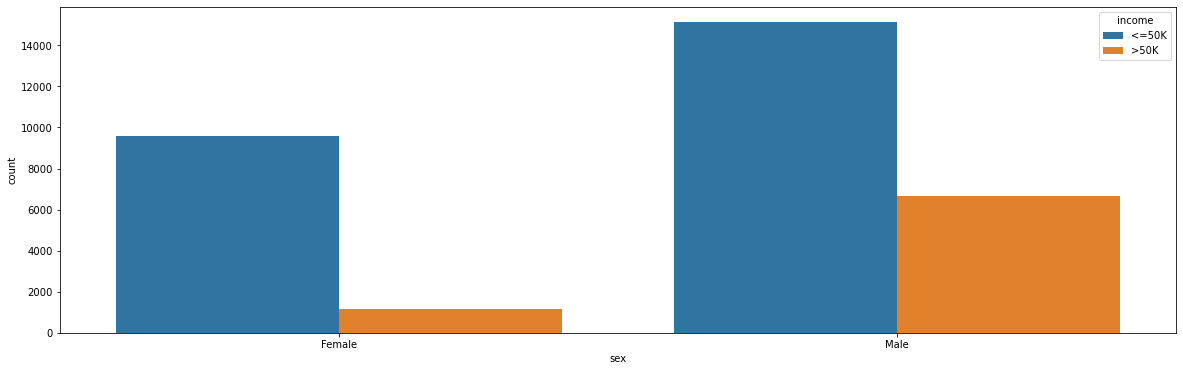

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(data['sex'], hue=data['income'])
plt.show()

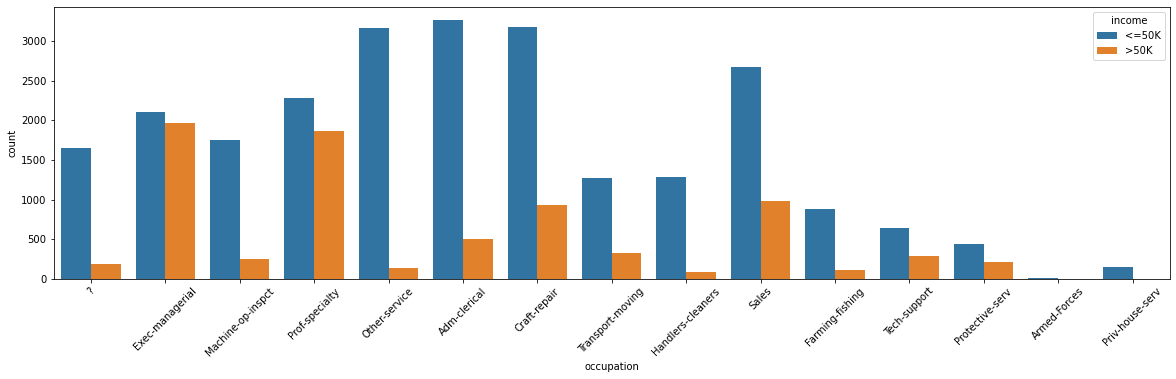

In [15]:
plt.figure(figsize = (20,5))
sex_occupation = sns.countplot(data['occupation'], hue = data['income'])
sex_occupation.set_xticklabels(sex_occupation.get_xticklabels(), rotation =45)
plt.show()

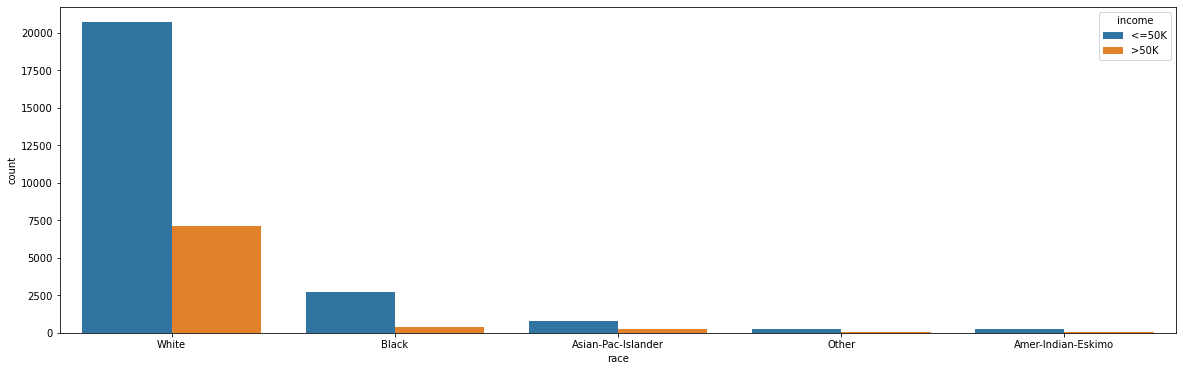

In [16]:
plt.figure(figsize=(20, 6))
sns.countplot(data['race'], hue=data['income'])
plt.show()

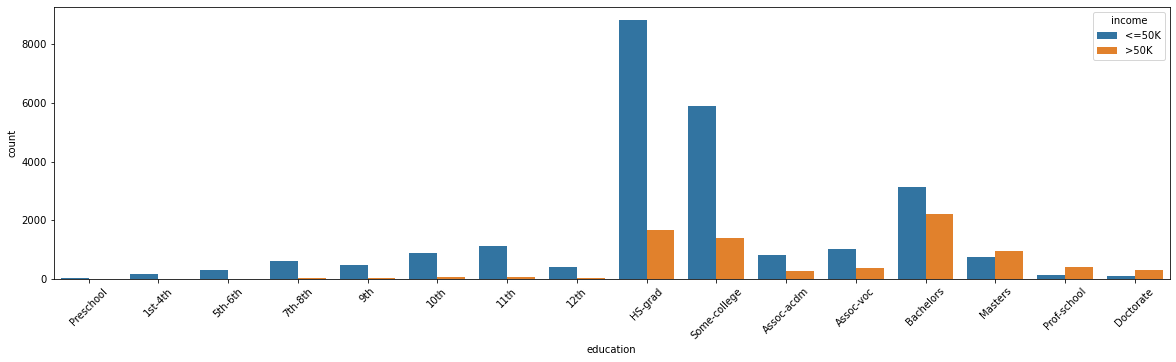

In [17]:
plt.figure(figsize = (20,5))
ed_occupation = sns.countplot(data['education'], hue = data['income'] ,order = order)
ed_occupation.set_xticklabels(ed_occupation.get_xticklabels(), rotation =45)
plt.show()

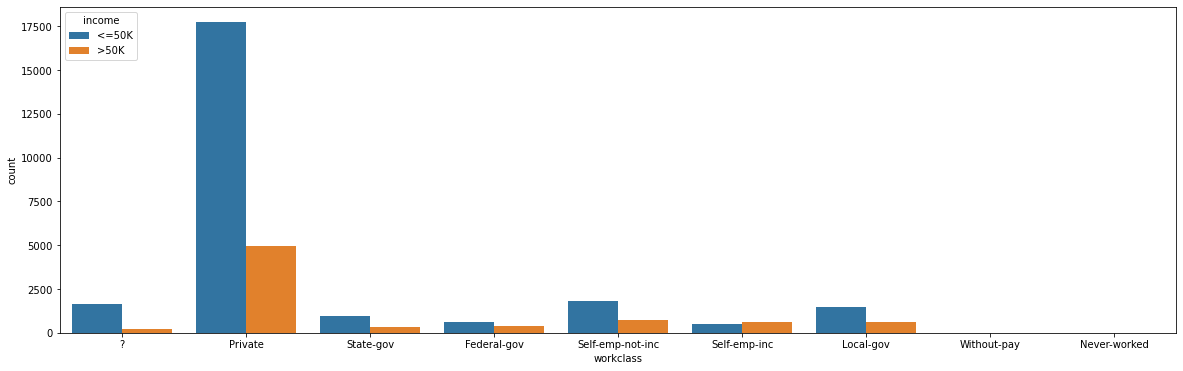

In [18]:
plt.figure(figsize=(20, 6))
sns.countplot(data['workclass'], hue=data['income'])
plt.show()

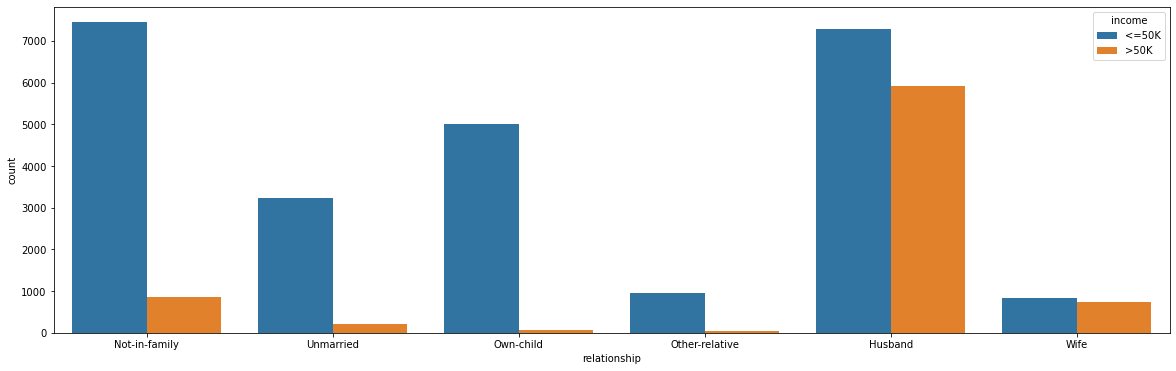

In [19]:
plt.figure(figsize=(20, 6))
sns.countplot(data['relationship'], hue=data['income'])
plt.show()

# > **Data Cleaning**

We will map categorical variables to logical variables to make data ready for further predictions.

In [20]:
data['sex'] = data['sex'].map({'Male': 1, 'Female': 0}) 

In [21]:
data['race'] = data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0}) 
data['relationship'] = data['relationship'].map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data['marital.status'] = data['marital.status'].map({'Widowed':0, 'Divorced':0, 'Separated':0, 'Never-married':0, 'Married-civ-spouse':1, 'Married-AF-spouse':1, 'Married-spouse-absent':0})

The following heat map shows corrrealtion between marital status and relationship variable. We can see that they are almost same variables now, after mapping. Thus we can drop any one of them.

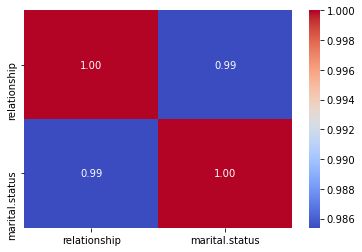

In [22]:
g = sns.heatmap(data[['relationship', 'marital.status']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


In [23]:
data.drop(['marital.status'], axis=1,inplace=True)

In [24]:
data.drop(['education'], axis=1,inplace=True)

labels = ['workclass', 'occupation', 'native.country']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for l in labels:
    data[l]=le.fit_transform(data[l])

In [25]:
data.head(10)

,age,workclass,fnlwgt,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,9,0,0,1,0,0,4356,40,39,<=50K
1,82,4,132870,9,4,0,1,0,0,4356,18,39,<=50K
2,66,0,186061,10,0,0,0,0,0,4356,40,39,<=50K
3,54,4,140359,4,7,0,1,0,0,3900,40,39,<=50K
4,41,4,264663,10,10,0,1,0,0,3900,40,39,<=50K
5,34,4,216864,9,8,0,1,0,0,3770,45,39,<=50K
6,38,4,150601,6,1,0,1,1,0,3770,40,39,<=50K
7,74,7,88638,16,10,0,1,0,0,3683,20,39,>50K
8,68,1,422013,9,10,0,1,0,0,3683,40,39,<=50K
9,41,4,70037,10,3,0,1,1,0,3004,60,0,>50K


# > **Prediction**

In [26]:
Selected_features = ['age','workclass','education.num','occupation','relationship','race','sex','capital.gain','fnlwgt','capital.loss','hours.per.week','native.country']

X = data[Selected_features]
y = data['income']

Import necessary libraries.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

we will split dataset into test and train data using train_test_split.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

I have used LogisticRegression, RandomForestClassifier and GradientBoostingClassifier for this data set.

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred,y_test)*100,2)
print(acc_logreg)

78.32


In [30]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

85.51


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost = GradientBoostingClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
acc_xgboost = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_xgboost)

86.47


GradientBoostingClassifier gave acccuracy of 86.49%.

This notebook will be updated in future.